#XGBOOST=python native
1.5.0버전 설치후 런타임 다시시작 꼬꼮곢꼭꼭

In [ ]:
# !pip install xgboost==1.5.0

In [ ]:
import xgboost as xgb
print(xgb.__version__)

1.5.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


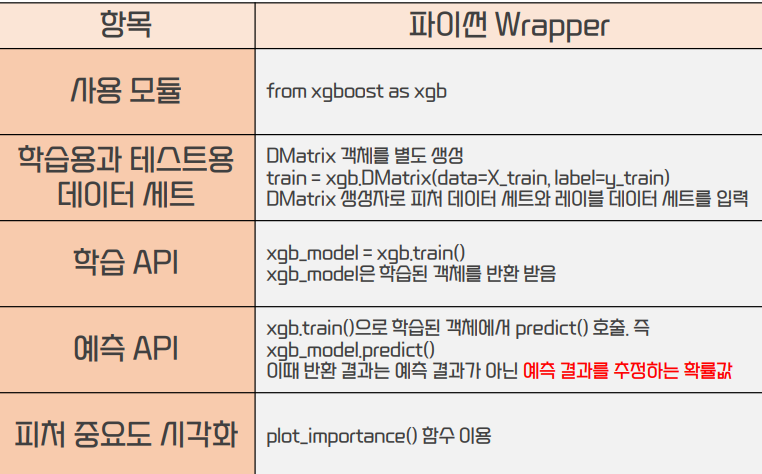

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    data_df.drop("target", axis=1),
    data_df['target'],
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    random_state=42
)

#DMatrix 변환
- 넘파이배열, 판다스 dataframe에서도 변환이 가능

In [ ]:
dtr = xgb.DMatrix(data=X_train, label=y_train)
dval = xgb.DMatrix(data=X_valid, label=y_valid)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# 하이퍼 파라미터 설정
params = {
    'max_depth':3,
    'eta': 0.05, # learning rate설정
    'objective':'binary:logistic', # 목적함수
    'eval_metric':'logloss' # 평가함수
}

num_rounds = 400 # 400번동안 훈련을 할꺼

# 훈련

In [ ]:
# 학습 데이터 세트는 train, 평가(검증)데이터 세트는 eval로 부른다!
eval_list = [
    (dtr,'train'), # dtr을 훈련data set로 쓰겠다
    (dval, 'eval')  # dval을 평가data set로 쓰겠다(교차검증은 아님)
]

xgb_model = xgb.train(
    params=params,
    dtrain=dtr,
    num_boost_round=num_rounds,# n_estimators와 같은 파라미터
    early_stopping_rounds=50, #조기중단
    evals=eval_list
)

[0]	train-logloss:0.65124	eval-logloss:0.65404
[1]	train-logloss:0.61200	eval-logloss:0.62023
[2]	train-logloss:0.57754	eval-logloss:0.58633
[3]	train-logloss:0.54460	eval-logloss:0.55826
[4]	train-logloss:0.51435	eval-logloss:0.53266
[5]	train-logloss:0.48771	eval-logloss:0.50902
[6]	train-logloss:0.46188	eval-logloss:0.48738
[7]	train-logloss:0.43893	eval-logloss:0.46707
[8]	train-logloss:0.41664	eval-logloss:0.44913
[9]	train-logloss:0.39683	eval-logloss:0.43179
[10]	train-logloss:0.37746	eval-logloss:0.41644
[11]	train-logloss:0.36018	eval-logloss:0.40182
[12]	train-logloss:0.34321	eval-logloss:0.38998
[13]	train-logloss:0.32734	eval-logloss:0.37724
[14]	train-logloss:0.31250	eval-logloss:0.36721
[15]	train-logloss:0.29930	eval-logloss:0.35642
[16]	train-logloss:0.28621	eval-logloss:0.34786
[17]	train-logloss:0.27395	eval-logloss:0.34002
[18]	train-logloss:0.26244	eval-logloss:0.33208
[19]	train-logloss:0.25146	eval-logloss:0.32362
[20]	train-logloss:0.24147	eval-logloss:0.31627
[2

In [ ]:
import numpy as np

pred_props = xgb_model.predict(dtest)
print(np.round(pred_props[:10],3))

[0.93  0.002 0.001 0.998 1.    0.001 0.003 0.569 0.449 0.996]


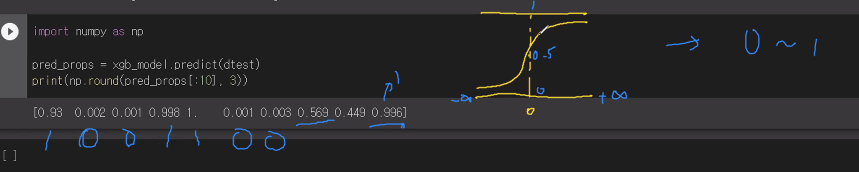

In [ ]:
preds = [1 if x >0.5 else 0 for x in pred_props]
print(preds[:10])

[1, 0, 0, 1, 1, 0, 0, 1, 0, 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test , preds, pred_props)

# 암이 0 종양이 1

오차 행렬
[[52  2]
 [ 4 85]]
정확도: 0.9580, 정밀도: 0.9770, 재현율: 0.9551,    F1: 0.9659, AUC:0.9950


# 특성 중요도 확인

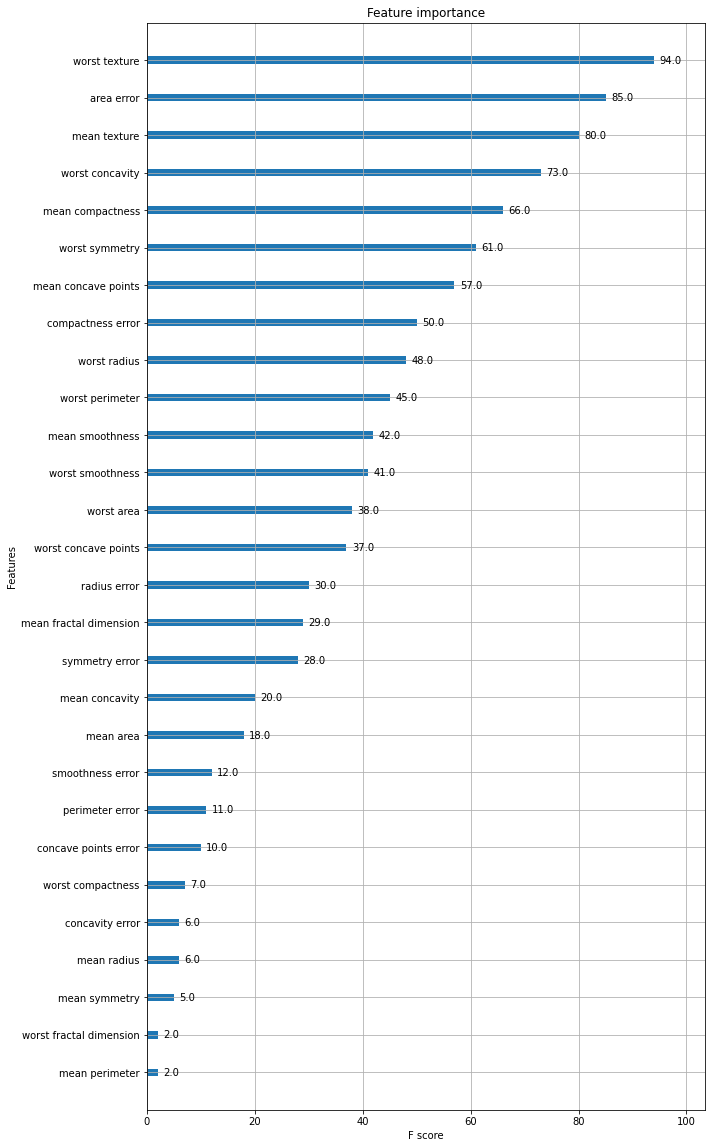

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,20))
plot_importance(xgb_model, ax=ax)

# XGBoost - sckit learn wrapper
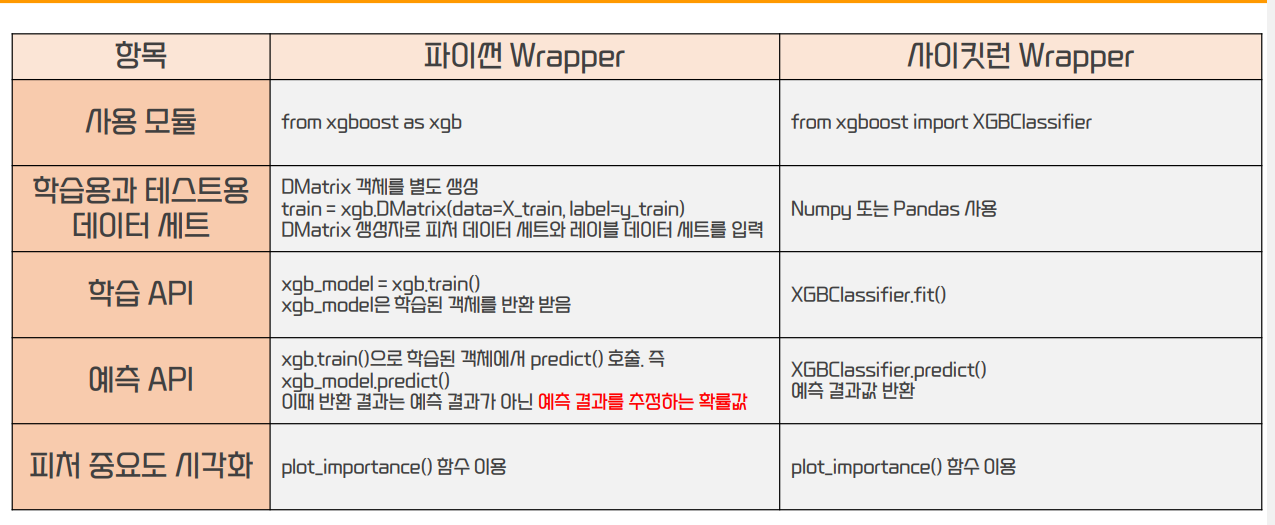

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# 분류기 객체 생성
xgb_wrapper = XGBClassifier(
    n_estimator=400,
    learning_rate=0.05,
    max_depth=3,
    eval_metric='logloss'
)

In [ ]:
xgb_wrapper.fit(X_train, y_train, verbose=True) # 훈련되는 로그를 보여주겠다

[02:44:53] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=400, n_estimators=100,
              n_jobs=2, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = xgb_wrapper.predict(X_test)
pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
pred_proba = xgb_wrapper.predict_proba(X_test)
pred_proba[:10]

array([[0.09124899, 0.908751  ],
       [0.987452  , 0.01254804],
       [0.9907831 , 0.00921691],
       [0.01095837, 0.9890416 ],
       [0.00754732, 0.9924527 ],
       [0.9918247 , 0.00817533],
       [0.9822272 , 0.01777276],
       [0.41142094, 0.58857906],
       [0.5549088 , 0.4450912 ],
       [0.02044046, 0.97955954]], dtype=float32)

In [ ]:
get_clf_eval(y_test, pred, pred_proba[:,1])

오차 행렬
[[49  5]
 [ 3 86]]
정확도: 0.9441, 정밀도: 0.9451, 재현율: 0.9663,    F1: 0.9556, AUC:0.9942


In [ ]:
# early stopping 50으로 설정해보기

xgb_wrapper = XGBClassifier(
    n_estimator=400,
    learning_rate=0.05,
    max_depth=3
)

In [ ]:
# 훈련 시점에 훈련에 관련된 하이퍼 파라미터 전달
evals = [
    (X_train, y_train), # 학습은 이걸로하겠다
    (X_valid, y_valid)  # 검증(평가)는 이걸로 하겠다
]

xgb_wrapper.fit(
    X_train,
    y_train,
    early_stopping_rounds=50,
    eval_metric="logloss",
    eval_set=evals,
    verbose=True
)


[02:44:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.65124	validation_1-logloss:0.65404
[1]	validation_0-logloss:0.61200	validation_1-logloss:0.62023
[2]	validation_0-logloss:0.57754	validation_1-logloss:0.58633
[3]	validation_0-logloss:0.54460	validation_1-logloss:0.55826
[4]	validation_0-logloss:0.51435	validation_1-logloss:0.53266
[5]	validation_0-logloss:0.48771	validation_1-logloss:0.50902
[6]	validation_0-logloss:0.46188	validation_1-logloss:0.48738
[7]	validation_0-logloss:0.43893	validation_1-logloss:0.46707
[8]	validation_0-logloss:0.41664	validation_1-logloss:0.44913
[9]	validation_0-logloss:0.39683	validation_1-logloss:0.43179
[10]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=400, n_estimators=100,
              n_jobs=2, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(
    y_test,
    pred,
    pred_proba
)

오차 행렬
[[49  5]
 [ 3 86]]
정확도: 0.9441, 정밀도: 0.9451, 재현율: 0.9663,    F1: 0.9556, AUC:0.9942


In [ ]:
# 조기중단을 10으로해보자
xgb_wrapper.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_metric='logloss',
    eval_set=evals,
    verbose=True
)


pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(
    y_test,
    pred,
    pred_proba
)


[02:44:56] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.65124	validation_1-logloss:0.65404
[1]	validation_0-logloss:0.61200	validation_1-logloss:0.62023
[2]	validation_0-logloss:0.57754	validation_1-logloss:0.58633
[3]	validation_0-logloss:0.54460	validation_1-logloss:0.55826
[4]	validation_0-logloss:0.51435	validation_1-logloss:0.53266
[5]	validation_0-logloss:0.48771	validation_1-logloss:0.50902
[6]	validation_0-logloss:0.46188	validation_1-logloss:0.48738
[7]	validation_0-logloss:0.43893	validation_1-logloss:0.46707
[8]	validation_0-logloss:0.41664	validation_1-logloss:0.44913
[9]	validation_0-logloss:0.39683	validation_1-logloss:0.43179
[10]	validation_0-

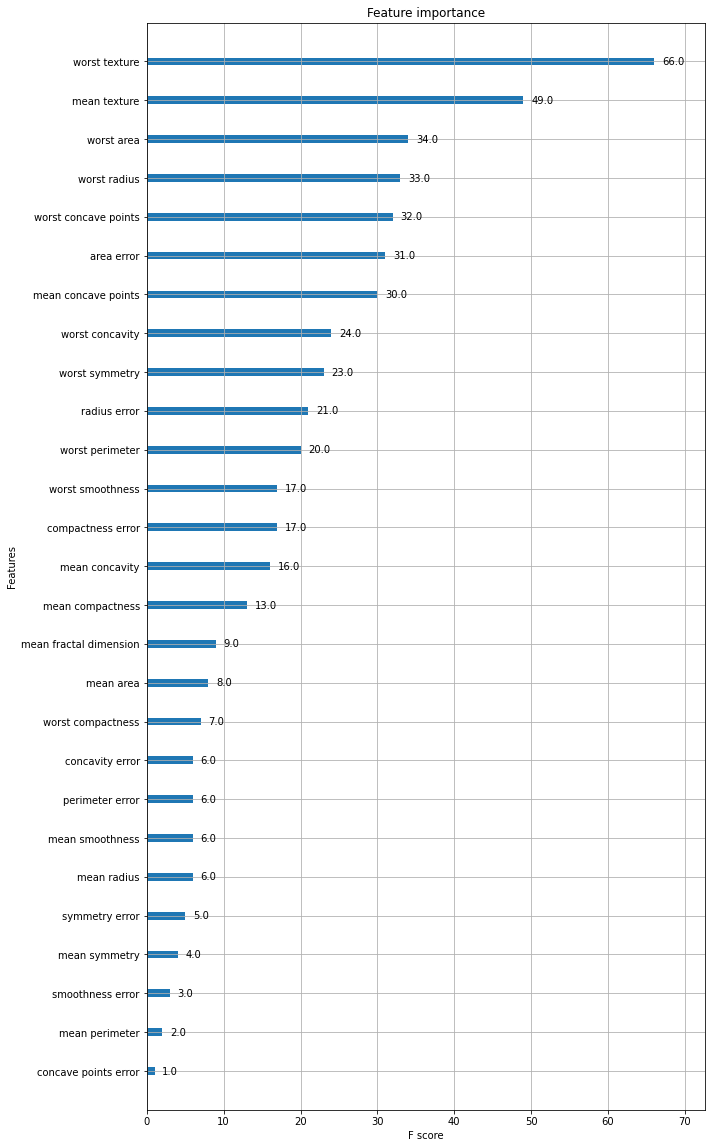

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

plot_importance(xgb_wrapper, ax=ax)

# lightGBM

In [ ]:
!pip install lightgbm==3.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# python wrapper안쓸꺼 걍 sklearn wrapper쓰겠음.
# 위에 xgb를 lgb로 바꾸면됨
import lightgbm

print(lightgbm.__version__)

3.3.2


In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05
)

lgbm_wrapper.fit(
    X_train,
    y_train,
    early_stopping_rounds=50,
    eval_metric='logloss',
    eval_set=evals,
    verbose=True
)

[1]	training's binary_logloss: 0.629304	valid_1's binary_logloss: 0.597757
[2]	training's binary_logloss: 0.594494	valid_1's binary_logloss: 0.566806
[3]	training's binary_logloss: 0.563069	valid_1's binary_logloss: 0.539975
[4]	training's binary_logloss: 0.534431	valid_1's binary_logloss: 0.514238
[5]	training's binary_logloss: 0.508118	valid_1's binary_logloss: 0.491893
[6]	training's binary_logloss: 0.482131	valid_1's binary_logloss: 0.471166
[7]	training's binary_logloss: 0.458798	valid_1's binary_logloss: 0.449081
[8]	training's binary_logloss: 0.438126	valid_1's binary_logloss: 0.430998
[9]	training's binary_logloss: 0.417853	valid_1's binary_logloss: 0.411616
[10]	training's binary_logloss: 0.398524	valid_1's binary_logloss: 0.396487
[11]	training's binary_logloss: 0.380582	valid_1's binary_logloss: 0.380199
[12]	training's binary_logloss: 0.363636	valid_1's binary_logloss: 0.36537
[13]	training's binary_logloss: 0.348995	valid_1's binary_logloss: 0.352506
[14]	training's binary

LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [ ]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[51  3]
 [ 2 87]]
정확도: 0.9650, 정밀도: 0.9667, 재현율: 0.9775,    F1: 0.9721, AUC:0.9933
